   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 7.2 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 7.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.0 MB 7.3 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 7.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.7 MB/s eta 0:00:00

Clustering with features: ['sepal_length', 'sepal_width']


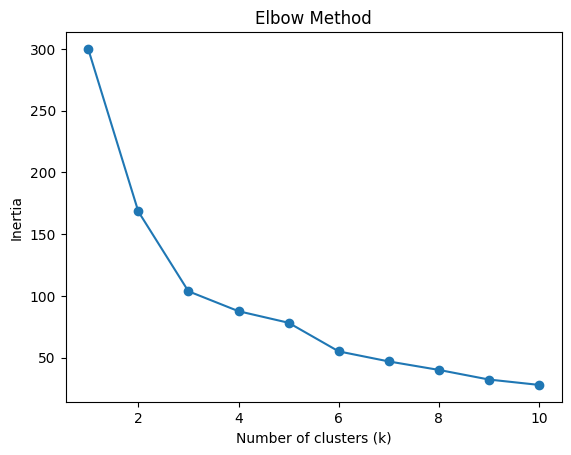

Optimal number of clusters: 2


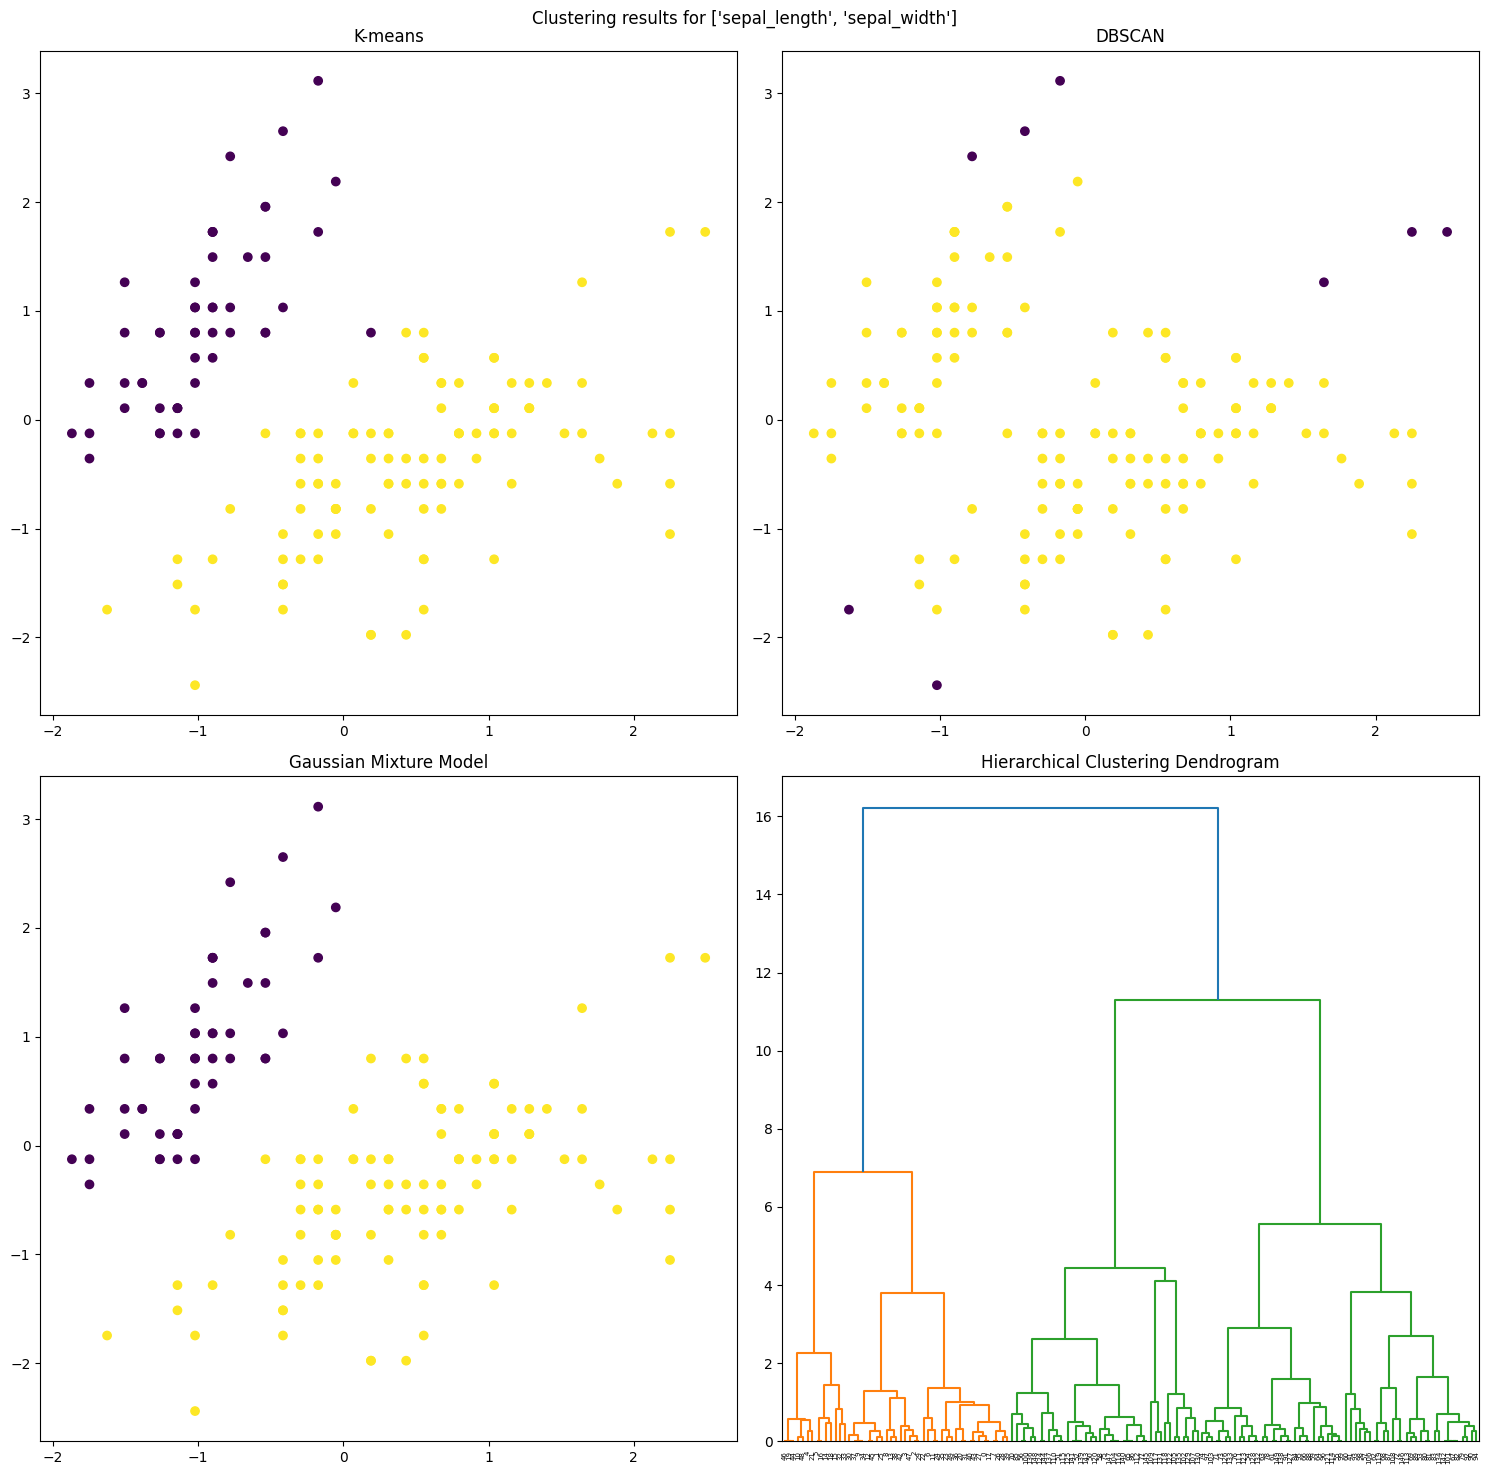

Silhouette Scores:
K-means: 0.444
DBSCAN: 0.395
GMM: 0.446

Clustering with features: ['petal_length', 'petal_width']


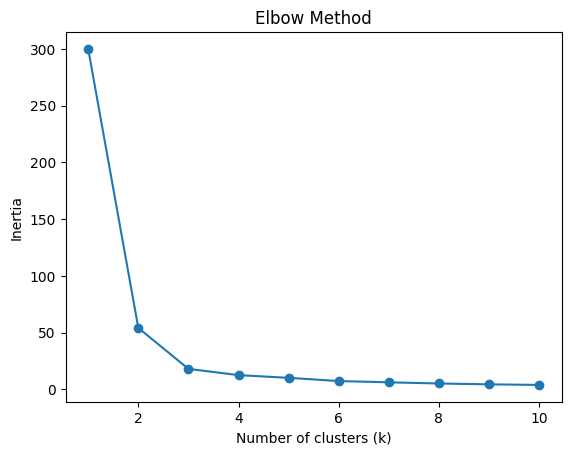

Optimal number of clusters: 2


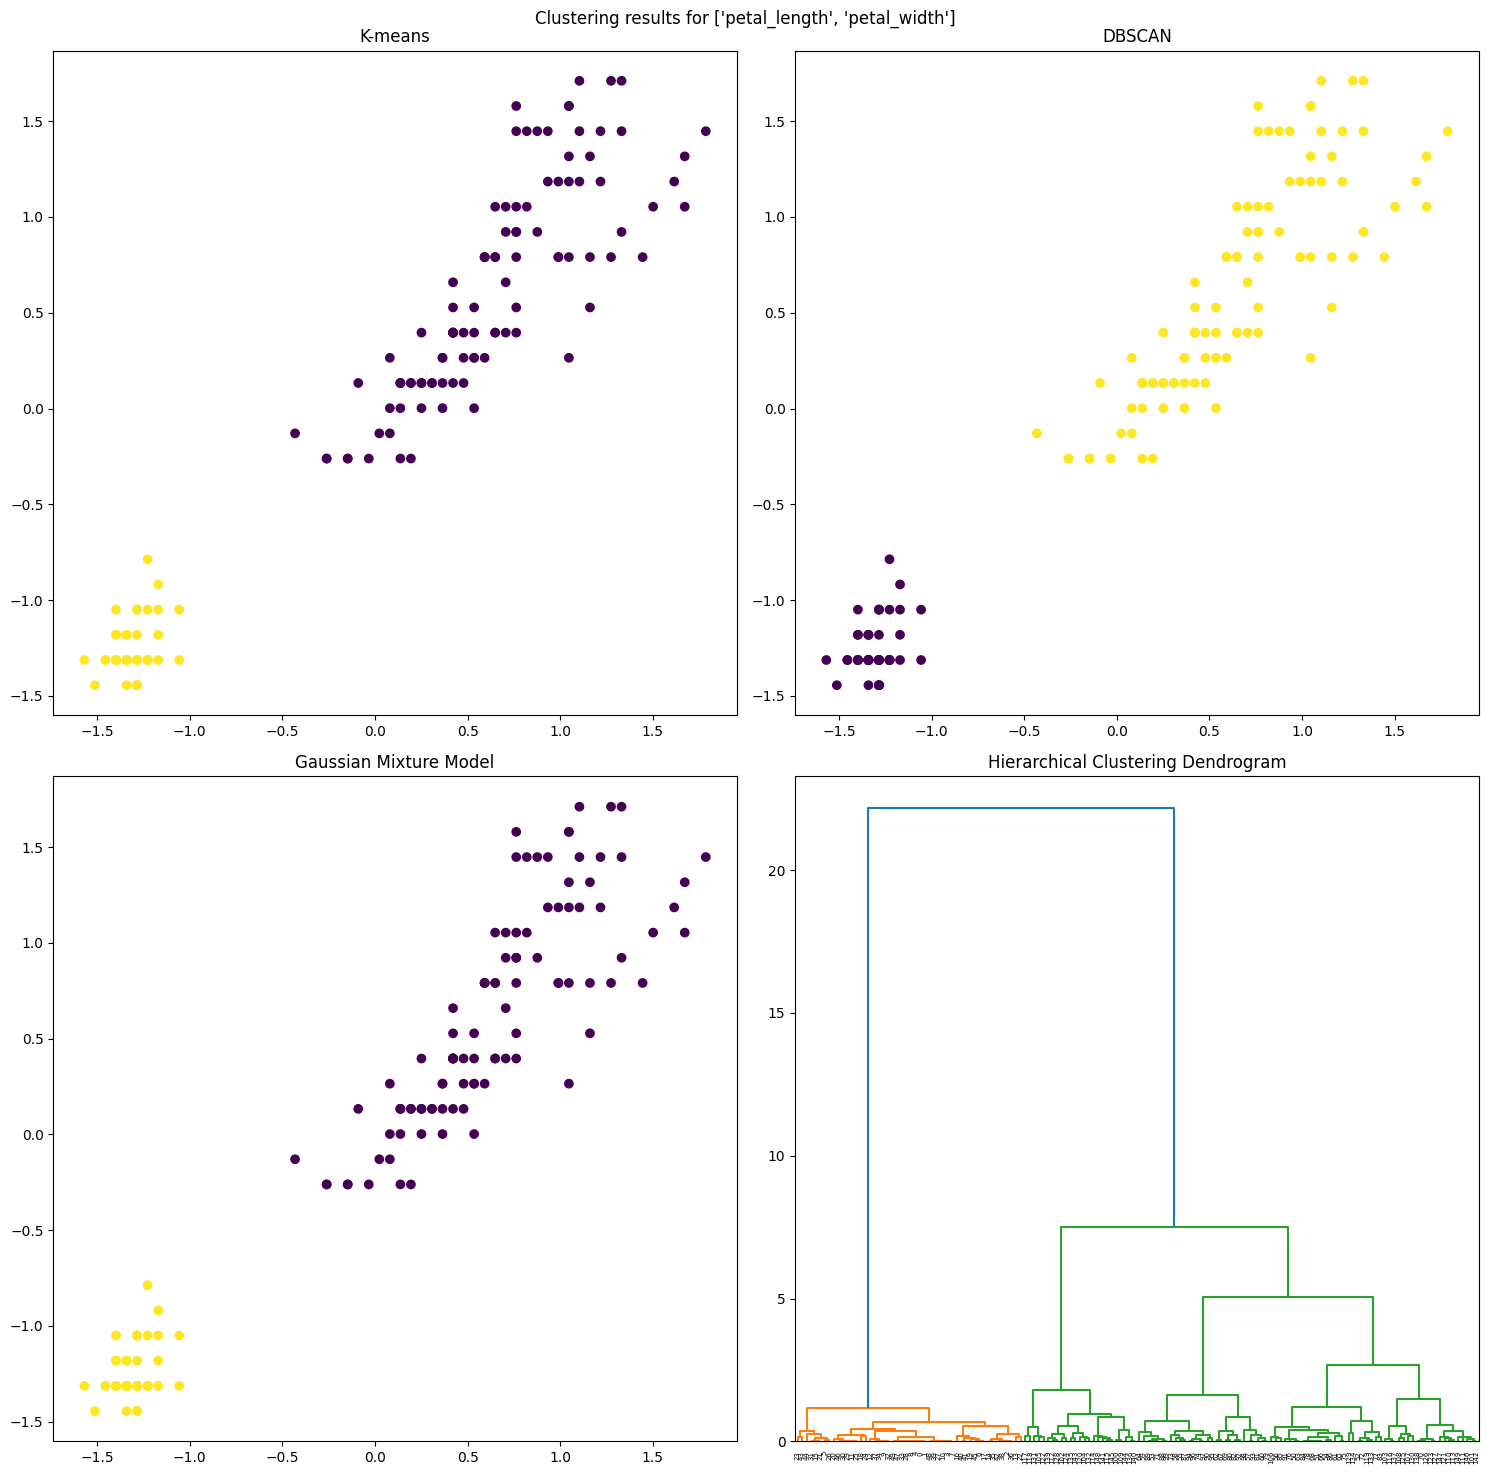

Silhouette Scores:
K-means: 0.743
DBSCAN: 0.743
GMM: 0.743

Clustering with features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


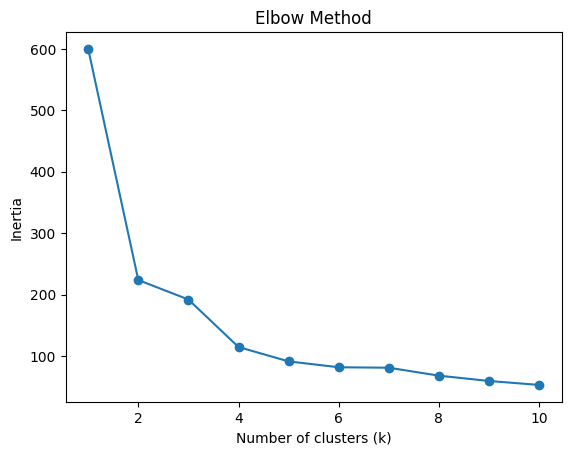

Optimal number of clusters: 2


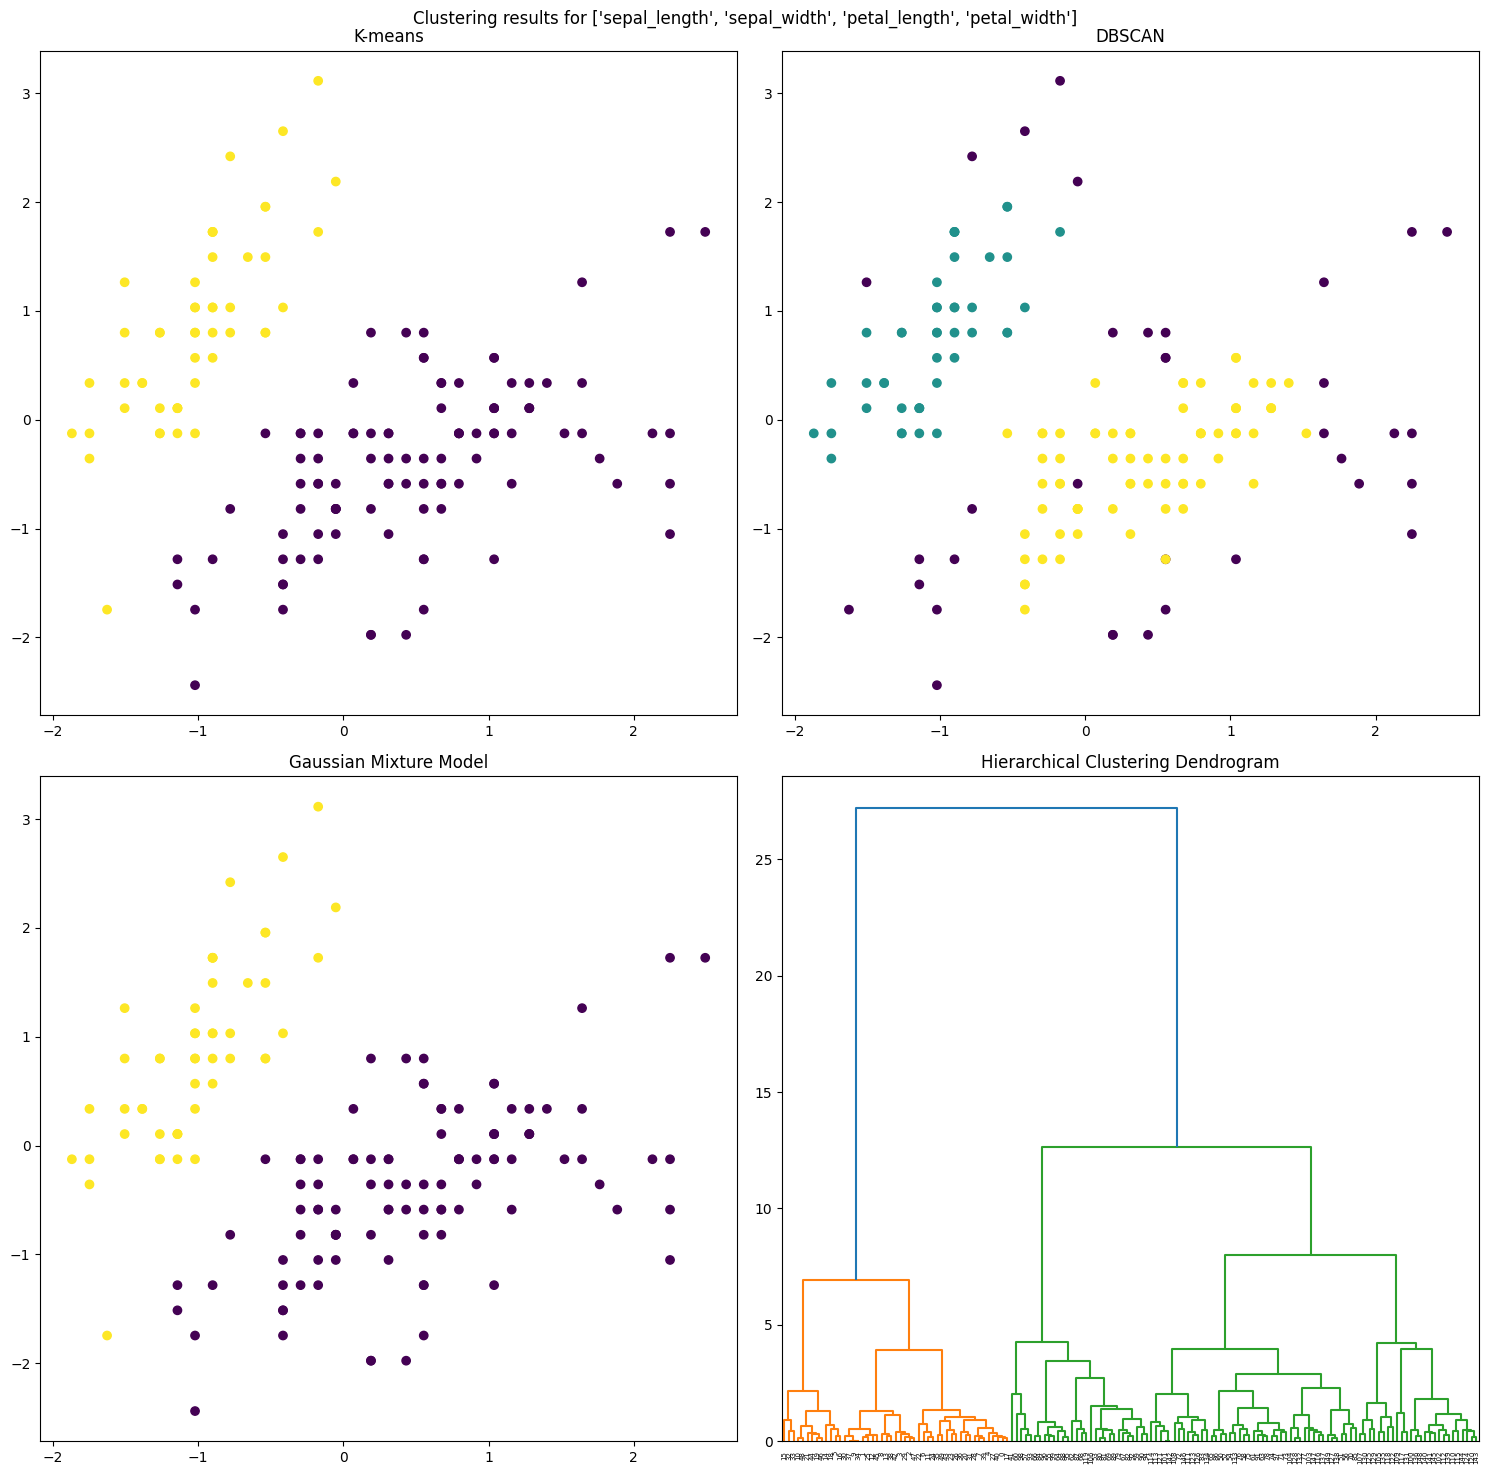

Silhouette Scores:
K-means: 0.580
DBSCAN: 0.349
GMM: 0.580


In [2]:
!pip install scipy
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
iris = pd.read_csv(r'C:\Users\91730\Desktop\class notes\dan\exercise_03\data\iris.data.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
X = iris.drop('species', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot elbow curve
def plot_elbow(X, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Function to find optimal number of clusters using silhouette score
def optimal_clusters(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    
    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_k

# a) Cluster the dataset with different feature combinations
feature_combinations = [
    ['sepal_length', 'sepal_width'],
    ['petal_length', 'petal_width'],
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
]

for features in feature_combinations:
    print(f"\nClustering with features: {features}")
    X_subset = X_scaled[:, [X.columns.get_loc(f) for f in features]]
    
    # b) Find optimal number of clusters
    plot_elbow(X_subset)
    optimal_k = optimal_clusters(X_subset)
    print(f"Optimal number of clusters: {optimal_k}")
    
    # c) Test different clustering procedures
    
    # K-means
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_subset)
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_subset)
    
    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=optimal_k, random_state=42)
    gmm_labels = gmm.fit_predict(X_subset)
    
    # Hierarchical Clustering
    linkage_matrix = linkage(X_subset, method='ward')
    
    # Plot results
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(f"Clustering results for {features}")
    
    axs[0, 0].scatter(X_subset[:, 0], X_subset[:, 1], c=kmeans_labels)
    axs[0, 0].set_title('K-means')
    
    axs[0, 1].scatter(X_subset[:, 0], X_subset[:, 1], c=dbscan_labels)
    axs[0, 1].set_title('DBSCAN')
    
    axs[1, 0].scatter(X_subset[:, 0], X_subset[:, 1], c=gmm_labels)
    axs[1, 0].set_title('Gaussian Mixture Model')
    
    dendrogram(linkage_matrix, ax=axs[1, 1])
    axs[1, 1].set_title('Hierarchical Clustering Dendrogram')
    
    plt.tight_layout()
    plt.show()

    print("Silhouette Scores:")
    print(f"K-means: {silhouette_score(X_subset, kmeans_labels):.3f}")
    print(f"DBSCAN: {silhouette_score(X_subset, dbscan_labels):.3f}")
    print(f"GMM: {silhouette_score(X_subset, gmm_labels):.3f}")